In [1]:
import pandas as pd
import numpy as np
import re
import plotly.offline as iplot
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv(r"F:\FYP-II-master\data\training.csv")
data.head()

,class,text,Unnamed: 2
0,PI,What's the difference between the iPhone X a...,NaN
1,no,@ siracusa just listened to Hypercritical #16...,NaN
2,PI,Same. IPhone X won't be bad https:// twitt...,NaN
3,no,Ive had the iphone 8 plus and iphone x and i...,NaN
4,no,“ iphone x for £150” do i have dickhead writ...,NaN


## Exploratory data analysis

In [3]:
data.shape
data.isnull().sum()

class            0
text             0
Unnamed: 2    1682
dtype: int64

## Data preprocessing

In [4]:
data=data.drop(columns=['Unnamed: 2'])

In [5]:
data['class']=data['class'].replace(['Undefined','undefined'],'un')
data=data[data['class']!='un']
data.head(10)

,class,text
0,PI,What's the difference between the iPhone X a...
1,no,@ siracusa just listened to Hypercritical #16...
2,PI,Same. IPhone X won't be bad https:// twitt...
3,no,Ive had the iphone 8 plus and iphone x and i...
4,no,“ iphone x for £150” do i have dickhead writ...
5,PI,This iPhone X still very sexy a year later
7,PI,If not I'm using my kidney. Omo what is ferrar...
8,PI,iPhone X 's max for sale
9,no,Someone once told me that.....\n\nBut I've nev...
10,PI,screenshots from the iphone x look so clapped


In [6]:
data['class']=data['class'].replace(['no','No'],0)
data['class']=data['class'].replace(['Pl','PI','yes','Yes'],1)
data_test=data
data.head(10)

,class,text
0,1,What's the difference between the iPhone X a...
1,0,@ siracusa just listened to Hypercritical #16...
2,1,Same. IPhone X won't be bad https:// twitt...
3,0,Ive had the iphone 8 plus and iphone x and i...
4,0,“ iphone x for £150” do i have dickhead writ...
5,1,This iPhone X still very sexy a year later
7,1,If not I'm using my kidney. Omo what is ferrar...
8,1,iPhone X 's max for sale
9,0,Someone once told me that.....\n\nBut I've nev...
10,1,screenshots from the iphone x look so clapped


In [7]:
data.shape

(904, 2)

In [ ]:
def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity
def subjectivity_analysis(text):
    return TextBlob(text).sentiment.subjectivity
data_test=data
data_test['polarity']=data_test['text'].apply(sentiment_analysis)
data_test['subjectivity']=data_test['text'].apply(subjectivity_analysis)
data_test
data_test['polarity'].iplot(kind='hist')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-5025141507eb>", line 9, in <module>
    data_test['polarity'].iplot(kind='hist')
  File "D:\anaconda\lib\site-packages\cufflinks\plotlytools.py", line 1216, in _iplot
    return iplot(figure,validate=validate,sharing=sharing,filename=filename,
  File "D:\anaconda\lib\site-packages\cufflinks\plotlytools.py", line 1470, in iplot
    return py.iplot(figure,validate=validate,sharing=sharing,
  File "D:\anaconda\lib\site-packages\chart_studio\plotly\plotly.py", line 135, in iplot
    url = plot(figure_or_data, **plot_options)
  File "D:\anaconda\lib\site-packages\chart_studio\plotly\plotly.py", line 276, in plot
    grid_ops.upload(
  File "D:\anaconda\lib\site-packages\chart_studio\plotly\plotly.py", line 1087, in upload
    file_info = _create_or_overwrite_grid(payload)
  File "D:\a

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-5025141507eb>", line 9, in <module>
    data_test['polarity'].iplot(kind='hist')
  File "D:\anaconda\lib\site-packages\cufflinks\plotlytools.py", line 1216, in _iplot
    return iplot(figure,validate=validate,sharing=sharing,filename=filename,
  File "D:\anaconda\lib\site-packages\cufflinks\plotlytools.py", line 1470, in iplot
    return py.iplot(figure,validate=validate,sharing=sharing,
  File "D:\anaconda\lib\site-packages\chart_studio\plotly\plotly.py", line 135, in iplot
    url = plot(figure_or_data, **plot_options)
  File "D:\anaconda\lib\site-packages\chart_studio\plotly\plotly.py", line 276, in plot
    grid_ops.upload(
  File "D:\anaconda\lib\site-packages\chart_studio\plotly\plotly.py", line 1087, in upload
    file_info = _create_or_overwrite_grid(payload)
  File "D:\a

## Text Preprocessing

In [8]:
# replace_space=re.compile('[/(){}\[\]\|@,;]')
# replace_bad_symbol=re.compile('[^0-9a-z #+_]')
Stopwords=set(stopwords.words('english'))

In [9]:
def clean_text(text):
    text=text.lower()
#     text=replace_space.sub(' ',text)
#     text=replace_bad_symbol.sub('',text)

    text=' '.join(word for word in text.split() if word not in Stopwords)
    return text

data['text']=data['text'].apply(clean_text)
data.head(10)

ERROR! Session/line number was not unique in database. History logging moved to new session 149


,class,text,polarity,subjectivity
0,1,what's difference iphone x iphone x x max?,0.000000,0.000000
1,0,"@ siracusa listened hypercritical #16, whole e...",-0.391667,0.683333
2,1,same. iphone x bad https:// twitter.com/afuaas...,-0.350000,0.395833
3,0,ive iphone 8 plus iphone x id say iphone 8 plu...,0.500000,0.500000
4,0,“ iphone x £150” dickhead written,0.000000,0.000000
5,1,iphone x still sexy year later,0.325000,0.500000
7,1,"i'm using kidney. omo ferrari, buggati, iphone...",0.136364,0.500000
8,1,iphone x 's max sale,0.000000,0.000000
9,0,someone told that..... i've never seen ios tur...,0.200000,0.400000
10,1,screenshots iphone x look clapped,0.000000,0.000000


In [30]:
t=Tokenizer(num_words=50000,lower=True)
t.fit_on_texts(data['text'])
x=t.texts_to_sequences(data['text'])
x=sequence.pad_sequences(x,maxlen=250)
print(x.shape)
print(x)

(904, 250)
[[   0    0    0 ...    2    2  128]
 [   0    0    0 ...    1    2  118]
 [   0    0    0 ...  118  972   28]
 ...
 [   0    0    0 ...    3  283   10]
 [   0    0    0 ...    2    8 2464]
 [   0    0    0 ...  558 2469  698]]


## calculate sentiment and subjectivity of tweets

#### subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).  Subjectivity lies between [0,1].

#### Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity

In [11]:
def sentiment_analysis(text):
    return TextBlob(text).sentiment.polarity
def subjectivity_analysis(text):
    return TextBlob(text).sentiment.subjectivity
data_sample=data
data_sample['polarity']=data_sample['text'].apply(sentiment_analysis)
data_sample['subjectivity']=data_sample['text'].apply(subjectivity_analysis)
data_sample

,class,text,polarity,subjectivity
0,1,what's difference iphone x iphone x x max?,0.000000,0.000000
1,0,"@ siracusa listened hypercritical #16, whole e...",-0.391667,0.683333
2,1,same. iphone x bad https:// twitter.com/afuaas...,-0.350000,0.395833
3,0,ive iphone 8 plus iphone x id say iphone 8 plu...,0.500000,0.500000
4,0,“ iphone x £150” dickhead written,0.000000,0.000000
...,...,...,...,...
1675,0,ew iphone 7’s camera quality looks trash next ...,-0.400000,0.500000
1677,0,@ apple hey brand new expensive iphone x suck?...,0.112121,0.584848
1678,0,unpopular opinion: hate iphone x models yet wo...,-0.800000,0.900000
1681,1,want iphone x bad :’(,-0.700000,0.666667


In [12]:
def count_words(text):
    return len(text)
data_sample['word_count']=data_sample['text'].apply(count_words)
data_sample

,class,text,polarity,subjectivity,word_count
0,1,what's difference iphone x iphone x x max?,0.000000,0.000000,42
1,0,"@ siracusa listened hypercritical #16, whole e...",-0.391667,0.683333,166
2,1,same. iphone x bad https:// twitter.com/afuaas...,-0.350000,0.395833,78
3,0,ive iphone 8 plus iphone x id say iphone 8 plu...,0.500000,0.500000,63
4,0,“ iphone x £150” dickhead written,0.000000,0.000000,33
...,...,...,...,...,...
1675,0,ew iphone 7’s camera quality looks trash next ...,-0.400000,0.500000,59
1677,0,@ apple hey brand new expensive iphone x suck?...,0.112121,0.584848,90
1678,0,unpopular opinion: hate iphone x models yet wo...,-0.800000,0.900000,70
1681,1,want iphone x bad :’(,-0.700000,0.666667,21


## Data Visualization

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='word_count', ylabel='Count'>

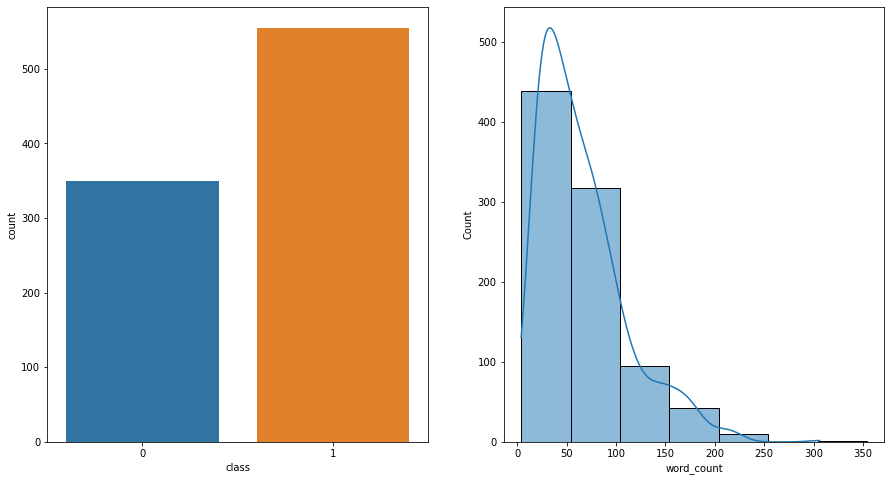

In [13]:
plt.rcParams['figure.figsize']=(15,8)
f,axes=plt.subplots(1,2)
sns.countplot(data['class'],ax=axes[0])
sns.histplot(data,x='word_count',binwidth=50,kde=True)

<AxesSubplot:xlabel='polarity', ylabel='Count'>

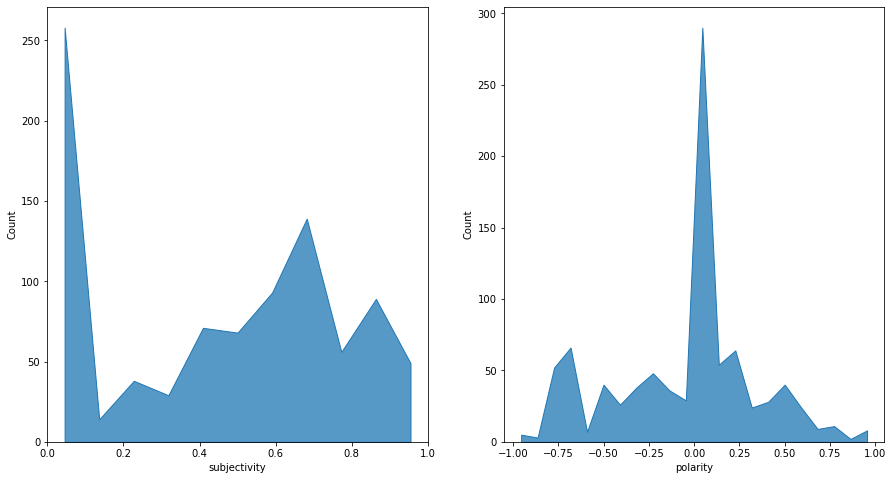

In [14]:
plt.rcParams['figure.figsize']=(15,8)
f,axes=plt.subplots(1,2)
sns.histplot(data=data_sample,x='subjectivity',element="poly",ax=axes[0])
sns.histplot(data=data_sample,x='polarity',element="poly")


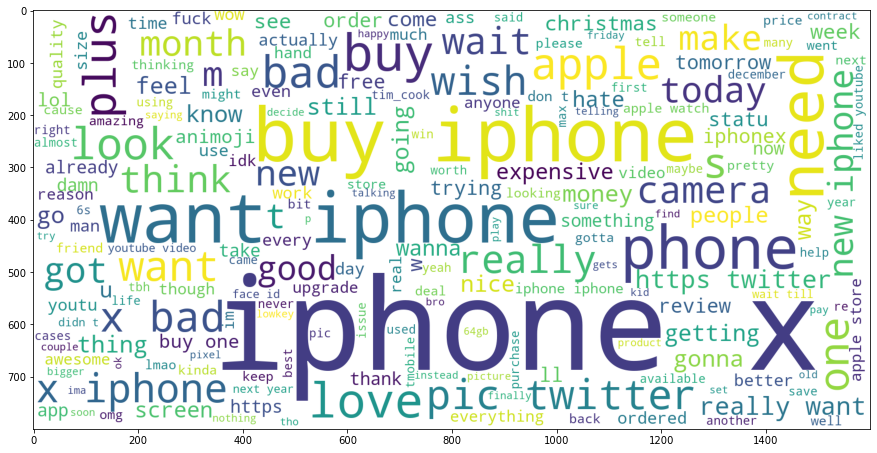

In [15]:
# visualize most recuring words in purchase intent and non purchase intent tweets
data_pi=data[data['class']==1]
data_no=data[data['class']==0]
wc=WordCloud(background_color='white',width=1600, height=800)
wc.generate(" ".join(data_pi['text']))
wc2=WordCloud(background_color='white',width=1600, height=800)
wc2.generate(" ".join(data_no['text']))
plt.imshow(wc)

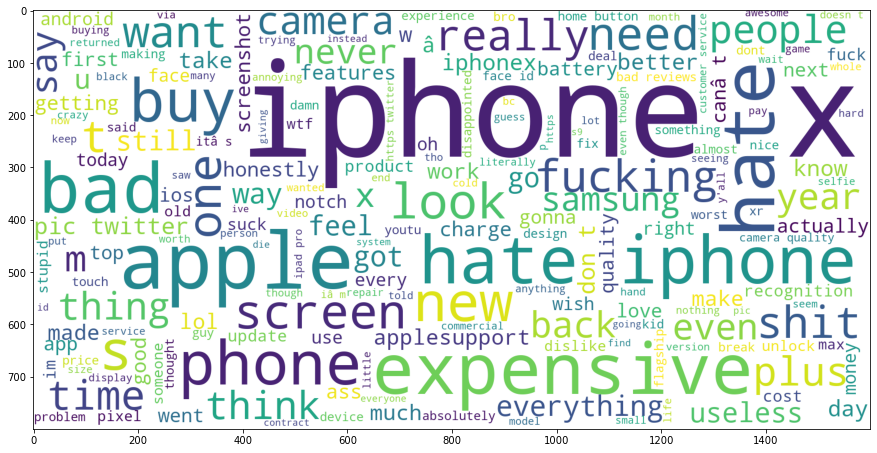

In [16]:
plt.imshow(wc2)

## Spliting of dataset

In [17]:
y=pd.get_dummies(data['class']).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
y

(813, 250) (91, 250)
(813, 2) (91, 2)


array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

## Training LSTM model

In [18]:
model=Sequential()
model.add(Embedding(50000,100,input_length=x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

fit=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Epoch 1/5
12/12 [==============================] - 66s 1s/step - loss: 0.6775 - accuracy: 0.6166 - val_loss: 0.6729 - val_accuracy: 0.5610
Epoch 2/5
12/12 [==============================] - 14s 1s/step - loss: 0.6458 - accuracy: 0.6097 - val_loss: 0.6570 - val_accuracy: 0.5610
Epoch 3/5
12/12 [==============================] - 15s 1s/step - loss: 0.5772 - accuracy: 0.6483 - val_loss: 0.5821 - val_accuracy: 0.7073
Epoch 4/5
12/12 [==============================] - 15s 1s/step - loss: 0.5224 - accuracy: 0.8392 - val_loss: 0.5397 - val_accuracy: 0.7073
Epoch 5/5
12/12 [==============================] - 15s 1s/step - loss: 0.2989 - accuracy: 0.9261 - val_loss: 0.5446 - val_accuracy: 0.7073


In [19]:
acr=model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 117ms/step - loss: 0.4407 - accuracy: 0.8462


In [20]:
y_test

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1,

In [21]:
# cal=t.texts_to_sequences(test)
cal=sequence.pad_sequences(x,maxlen=250)
pred=model.predict_classes(x_test)
pred=np.reshape(pred,(len(pred),1))
pred

C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [22]:
y=list(y_test)
y2=[]
for i in range(len(y)):
    if y[i][0]==1:
        y2.append(0)
    else:
        y2.append(1)
len(y2)

91

In [23]:
y_true = y2
y_pred = list(pred)
target_names = ['no','yes']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          no       0.83      0.73      0.77        33
         yes       0.85      0.91      0.88        58

    accuracy                           0.85        91
   macro avg       0.84      0.82      0.83        91
weighted avg       0.84      0.85      0.84        91



In [51]:
x=t.texts_to_sequences(["I had the samsung galaxy note 10 so long I couldn’t wait to go back to the regular size phone after getting the 11 Max! Now I have the 12 Pro and I want the Max again!"])
x=sequence.pad_sequences(x,maxlen=250)
p=model.predict_classes(x)
p=np.reshape(p,(len(p),1))
p

array([[1]], dtype=int64)